Movie reviews can be classified as either favorable or not.

The evaluation of movie review text is a classification problem often called sentiment analysis. A popular technique for developing sentiment analysis models is to use a bag-of-words model that transforms documents into vectors where each word in the document is assigned a score.

develop a deep learning predictive model using the bag-of-words representation for movie review sentiment classification.

**Movie Review Dataset**

**Data Preparation**

Separation of data into training and test sets.
Loading and cleaning the data to remove punctuation and numbers.
Defining a vocabulary of preferred words.



1.   Split into Train and Test Sets

we are developing a system that can predict the sentiment of a textual movie review as either positive or negative. **This means that after the model is developed, we will need to make predictions on new textual reviews.**  This will require all of the same data preparation to be performed on those new reviews as is performed on the training data for the model. **That being said, we will use the last 100 positive reviews and the last 100 negative reviews as a test set (100 reviews) and the remaining 1,800 reviews as the training dataset.**


This is a 90% train, 10% split of the data.






**Loading and Cleaning Reviews**

The text data is already pretty clean, so not much preparation is required.

Split tokens on white space.
Remove all punctuation from words.
Remove all words that are not purely comprised of alphabetical characters.
Remove all words that are known stop words.
Remove all words that have a length <= 1 character.




In [1]:
from nltk.corpus import stopwords
import string
import nltk
nltk.download('stopwords')
 
# load doc into memory
def load_doc(filename):
	# open the file as read only
	file = open(filename, 'r')
	# read all text
	text = file.read()
	# close the file
	file.close()
	return text
 
# turn a doc into clean tokens
def clean_doc(doc):
	# split into tokens by white space
	tokens = doc.split()
	# remove punctuation from each token
	table = str.maketrans('', '', string.punctuation)
	tokens = [w.translate(table) for w in tokens]
	# remove remaining tokens that are not alphabetic
	tokens = [word for word in tokens if word.isalpha()]
	# filter out stop words
	stop_words = set(stopwords.words('english'))
	tokens = [w for w in tokens if not w in stop_words]
	# filter out short tokens
	tokens = [word for word in tokens if len(word) > 1]
	return tokens
 
# load the document
filename = '/content/drive/My Drive/AIML_IIT_exe/AIML_HYD_15/Unit 1/txt_sentoken/neg/cv099_11189.txt'
text = load_doc(filename)
tokens = clean_doc(text)
print(tokens)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
['whether', 'like', 'beatles', 'nobody', 'wants', 'see', 'bee', 'gees', 'take', 'fab', 'fours', 'best', 'known', 'songs', 'well', 'maybe', 'thats', 'true', 'maybe', 'youre', 'curious', 'way', 'look', 'hanky', 'blow', 'nose', 'know', 'bad', 'bad', 'thats', 'case', 'rejoice', 'twenty', 'years', 'ago', 'today', 'sgt', 'peppers', 'lonely', 'hearts', 'club', 'band', 'released', 'unleashed', 'world', 'thanks', 'modern', 'technological', 'advances', 'find', 'retched', 'piece', 'filmmaking', 'vhs', 'derived', 'lyrics', 'various', 'beatles', 'songs', 'sgt', 'peppers', 'tells', 'story', 'fictitious', 'band', 'made', 'popular', 'song', 'album', 'name', 'released', 'course', 'movie', 'made', 'eleven', 'years', 'later', 'gibbs', 'three', 'become', 'lonely', 'hearts', 'peter', 'frampton', 'one', 'billy', 'shears', 'aside', 'rock', 'band', 'story', 'doesnt', 'correlate', 'song', 'oh', 'joy',

 **Define a Vocabulary**

 The more words, the larger the representation of documents, therefore it is important to constrain the words to only those believed to be predictive. This is difficult to know beforehand and often it is important to test different hypotheses about how to construct a useful vocabulary.


We can develop a vocabulary as a Counter, which is a dictionary mapping of words and their count that allows us to easily update and query.

Each document can be added to the counter (a new function called add_doc_to_vocab()) and we can step over all of the reviews in the negative directory and then the positive directory (a new function called process_docs()).



In [2]:
from string import punctuation
from os import listdir
from collections import Counter
from nltk.corpus import stopwords
 
# load doc into memory
def load_doc(filename):
	# open the file as read only
	file = open(filename, 'r')
	# read all text
	text = file.read()
	# close the file
	file.close()
	return text
 
# turn a doc into clean tokens
def clean_doc(doc):
	# split into tokens by white space
	tokens = doc.split()
	# remove punctuation from each token
	table = str.maketrans('', '', punctuation)
	tokens = [w.translate(table) for w in tokens]
	# remove remaining tokens that are not alphabetic
	tokens = [word for word in tokens if word.isalpha()]
	# filter out stop words
	stop_words = set(stopwords.words('english'))
	tokens = [w for w in tokens if not w in stop_words]
	# filter out short tokens
	tokens = [word for word in tokens if len(word) > 1]
	return tokens
 
# load doc and add to vocab
def add_doc_to_vocab(filename, vocab):
	# load doc
	doc = load_doc(filename)
	# clean doc
	tokens = clean_doc(doc)
	# update counts
	vocab.update(tokens)
 
# load all docs in a directory
def process_docs(directory, vocab):
	# walk through all files in the folder
	for filename in listdir(directory):
		# skip any reviews in the test set
		if filename.startswith('cv9'):
			continue
		# create the full path of the file to open
		path = directory + '/' + filename
		# add doc to vocab
		add_doc_to_vocab(path, vocab)
 
# define vocab
vocab = Counter()
# add all docs to vocab
process_docs('/content/drive/My Drive/AIML_IIT_exe/AIML_HYD_15/Unit 1/txt_sentoken/pos', vocab)
process_docs('/content/drive/My Drive/AIML_IIT_exe/AIML_HYD_15/Unit 1/txt_sentoken/neg', vocab)
# print the size of the vocab
print(len(vocab))
# print the top words in the vocab
print(vocab.most_common(50))

44276
[('film', 7983), ('one', 4946), ('movie', 4826), ('like', 3201), ('even', 2262), ('good', 2080), ('time', 2041), ('story', 1907), ('films', 1873), ('would', 1844), ('much', 1824), ('also', 1757), ('characters', 1735), ('get', 1724), ('character', 1703), ('two', 1643), ('first', 1588), ('see', 1557), ('way', 1515), ('well', 1511), ('make', 1418), ('really', 1407), ('little', 1351), ('life', 1334), ('plot', 1288), ('people', 1269), ('bad', 1248), ('could', 1248), ('scene', 1241), ('movies', 1238), ('never', 1201), ('best', 1179), ('new', 1140), ('scenes', 1135), ('man', 1131), ('many', 1130), ('doesnt', 1118), ('know', 1092), ('dont', 1086), ('hes', 1024), ('great', 1014), ('another', 992), ('action', 985), ('love', 977), ('us', 967), ('go', 952), ('director', 948), ('end', 946), ('something', 945), ('still', 936)]


Running the example shows that we have a vocabulary of 44,276 words.

Note that this vocabulary was constructed based on only those reviews in the training dataset.

We can step through the vocabulary and remove all words that have a low occurrence, such as only being used once or twice in all reviews.



In [ ]:

# keep tokens with a min occurrence
min_occurane = 2
tokens = [k for k,c in vocab.items() if c >= min_occurane]
print(len(tokens))

25767


Finally, the vocabulary can be saved to a new file called vocab.txt that we can later load and use to filter movie reviews prior to encoding them for modeling. We define a new function called save_list() that saves the vocabulary to file, with one word per file.



In [ ]:

# save list to file
def save_list(lines, filename):
	# convert lines to a single blob of text
	data = '\n'.join(lines)
	# open file
	file = open(filename, 'w')
	# write text
	file.write(data)
	# close file
	file.close()
 
# save tokens to a vocabulary file
save_list(tokens, '/content/drive/My Drive/AIML_IIT_exe/AIML_HYD_15/Unit 1/txt_sentoken/vocab.txt')

NameError: ignored

Running the min occurrence filter on the vocabulary and saving it to file, you should now have a new file called vocab.txt with only the words we are interested in.



**Bag-of-Words Representation**

convert each review into a representation that we can provide to a Multilayer Perceptron model. A bag-of-words model is a way of extracting features from text so the text input can be used with machine learning algorithms like neural networks.

Each document, in this case a review, is **converted into a vector representation**. The number of items in the vector representing a document corresponds to the number of words in the vocabulary. **The larger the vocabulary, the longer the vector representation,** hence the preference for smaller vocabularies in the previous section.

Words in a document are** scored and the scores are placed in the corresponding location in the representation**. We will look at different word scoring methods in the next section.

In this section, we are concerned with converting reviews into vectors ready for training a first neural network model.

This section is divided into 2 steps:

Converting reviews to lines of tokens.
Encoding reviews with a bag-of-words model representation.



**Reviews to Lines of Tokens**

Before we can convert reviews to vectors for modeling, we must first clean them up.

This involves loading them, performing the cleaning operation developed above, filtering out words not in the chosen vocabulary, and converting the remaining tokens into a single string or line ready for encoding.

First, we need a function to prepare one document. Below lists the function doc_to_line() that will load a document, clean it, filter out tokens not in the vocabulary, then return the document as a string of white space separated tokens.




In [ ]:

# load doc, clean and return line of tokens
def doc_to_line(filename, vocab):
	# load the doc
	doc = load_doc(filename)
	# clean doc
	tokens = clean_doc(doc)
	# filter by vocab
	tokens = [w for w in tokens if w in vocab]
	return ' '.join(tokens)

Next, we need a function to work through all documents in a directory (such as ‘pos‘ and ‘neg‘) to convert the documents into lines.

Below lists the process_docs() function that does just this, expecting a directory name and a vocabulary set as input arguments and returning a list of processed documents.

In [ ]:

# load all docs in a directory
def process_docs(directory, vocab):
	lines = list()
	# walk through all files in the folder
	for filename in listdir(directory):
		# skip any reviews in the test set
		if filename.startswith('cv9'):
			continue
		# create the full path of the file to open
		path = directory + '/' + filename
		# load and clean the doc
		line = doc_to_line(path, vocab)
		# add to list
		lines.append(line)
	return lines

Finally, we need to load the vocabulary and turn it into a set for use in cleaning reviews.



In [ ]:

# load the vocabulary
vocab_filename = '/content/drive/My Drive/AIML_IIT_exe/AIML_HYD_15/Unit 1/txt_sentoken/vocab.txt'
vocab = load_doc(vocab_filename)
vocab = vocab.split()
vocab = set(vocab)

demonstrating how to prepare the positive and negative reviews from the training dataset.

In [ ]:
# load all training reviews
positive_lines=('/content/drive/My Drive/AIML_IIT_exe/AIML_HYD_15/Unit 1/txt_sentoken/pos', vocab)
negative_lines=('/content/drive/My Drive/AIML_IIT_exe/AIML_HYD_15/Unit 1/txt_sentoken/neg', vocab)
# summarize what we have
print(len(positive_lines), len(negative_lines))

2 2


In [ ]:

from string import punctuation
from os import listdir
from collections import Counter
from nltk.corpus import stopwords
 
# load doc into memory
def load_doc(filename):
	# open the file as read only
	file = open(filename, 'r')
	# read all text
	text = file.read()
	# close the file
	file.close()
	return text
 
# turn a doc into clean tokens
def clean_doc(doc):
	# split into tokens by white space
	tokens = doc.split()
	# remove punctuation from each token
	table = str.maketrans('', '', punctuation)
	tokens = [w.translate(table) for w in tokens]
	# remove remaining tokens that are not alphabetic
	tokens = [word for word in tokens if word.isalpha()]
	# filter out stop words
	stop_words = set(stopwords.words('english'))
	tokens = [w for w in tokens if not w in stop_words]
	# filter out short tokens
	tokens = [word for word in tokens if len(word) > 1]
	return tokens
 
# load doc, clean and return line of tokens
def doc_to_line(filename, vocab):
	# load the doc
	doc = load_doc(filename)
	# clean doc
	tokens = clean_doc(doc)
	# filter by vocab
	tokens = [w for w in tokens if w in vocab]
	return ' '.join(tokens)
 
# load all docs in a directory
def process_docs(directory, vocab):
	lines = list()
	# walk through all files in the folder
	for filename in listdir(directory):
		# skip any reviews in the test set
		if filename.startswith('cv9'):
			continue
		# create the full path of the file to open
		path = directory + '/' + filename
		# load and clean the doc
		line = doc_to_line(path, vocab)
		# add to list
		lines.append(line)
	return lines
 
# load the vocabulary
vocab_filename = '/content/drive/My Drive/AIML_IIT_exe/AIML_HYD_15/Unit 1/txt_sentoken/vocab.txt'
vocab = load_doc(vocab_filename)
vocab = vocab.split()
vocab = set(vocab)
# load all training reviews
positive_lines = process_docs('/content/drive/My Drive/AIML_IIT_exe/AIML_HYD_15/Unit 1/txt_sentoken/pos', vocab)
negative_lines = process_docs('/content/drive/My Drive/AIML_IIT_exe/AIML_HYD_15/Unit 1/txt_sentoken/neg', vocab)
# summarize what we have
print(len(positive_lines), len(negative_lines))

900 900


**Movie Reviews to Bag-of-Words Vectors**

Keras provides the Tokenize class that can do some of the cleaning and vocab definition tasks that we took care of in the previous section.

It is better to do this ourselves to know exactly what was done and why. Nevertheless, the Tokenizer class is convenient and will easily transform documents into encoded vectors.

**First, the Tokenizer must be created, then fit on the text documents in the training dataset.**





In [ ]:
from keras.preprocessing.text import Tokenizer

# create the tokenizer
tokenizer = Tokenizer()
# fit the tokenizer on the documents
docs = positive_lines + negative_lines
tokenizer.fit_on_texts(docs)

This process determines a consistent way to convert the vocabulary to a fixed-length vector with 25,768 elements, which is the total number of words in the vocabulary file vocab.txt.

Next, documents can then be encoded using the Tokenizer by calling texts_to_matrix(). The function takes both a list of documents to encode and an encoding mode, which is the method used to score words in the document. Here we specify ‘freq‘ to score words based on their frequency in the document.

 

In [ ]:

# encode training data set
Xtrain = tokenizer.texts_to_matrix(docs, mode='freq')
print(Xtrain.shape)

(1800, 25768)


This encodes all of the positive and negative reviews in the training dataset and prints the shape of the resulting matrix as 1,800 documents each with the length of 25,768 elements. It is ready to use as training data for a model.



**We can encode the test data in a similar way.**

First, the process_docs() function from the previous section needs to be modified to only process reviews in the test dataset, not the training dataset.

We support the loading of both the training and test datasets by adding an is_trian argument and using that to decide what review file names to skip



In [ ]:

# load all docs in a directory
def process_docs(directory, vocab, is_trian):
	lines = list()
	# walk through all files in the folder
	for filename in listdir(directory):
		# skip any reviews in the test set
		if is_trian and filename.startswith('cv9'):
			continue
		if not is_trian and not filename.startswith('cv9'):
			continue
		# create the full path of the file to open
		path = directory + '/' + filename
		# load and clean the doc
		line = doc_to_line(path, vocab)
		# add to list
		lines.append(line)
	return lines

Next, we can load and encode positive and negative reviews in the test set in the same way as we did for the training set.



In [ ]:

# load all test reviews
positive_lines = process_docs('/content/drive/My Drive/AIML_IIT_exe/AIML_HYD_15/Unit 1/txt_sentoken/pos', vocab, False)
negative_lines = process_docs('/content/drive/My Drive/AIML_IIT_exe/AIML_HYD_15/Unit 1/txt_sentoken/neg', vocab, False)
docs = negative_lines + positive_lines
# encode training data set
Xtest = tokenizer.texts_to_matrix(docs, mode='freq')
print(Xtest.shape)

(200, 25768)


**We can put all of this together in a single example.**

*italicized text*

In [ ]:
from string import punctuation
from os import listdir
from collections import Counter
from nltk.corpus import stopwords
from keras.preprocessing.text import Tokenizer
 
# load doc into memory
def load_doc(filename):
	# open the file as read only
	file = open(filename, 'r')
	# read all text
	text = file.read()
	# close the file
	file.close()
	return text
 
# turn a doc into clean tokens
def clean_doc(doc):
	# split into tokens by white space
	tokens = doc.split()
	# remove punctuation from each token
	table = str.maketrans('', '', punctuation)
	tokens = [w.translate(table) for w in tokens]
	# remove remaining tokens that are not alphabetic
	tokens = [word for word in tokens if word.isalpha()]
	# filter out stop words
	stop_words = set(stopwords.words('english'))
	tokens = [w for w in tokens if not w in stop_words]
	# filter out short tokens
	tokens = [word for word in tokens if len(word) > 1]
	return tokens
 
# load doc, clean and return line of tokens
def doc_to_line(filename, vocab):
	# load the doc
	doc = load_doc(filename)
	# clean doc
	tokens = clean_doc(doc)
	# filter by vocab
	tokens = [w for w in tokens if w in vocab]
	return ' '.join(tokens)
 
# load all docs in a directory
def process_docs(directory, vocab, is_trian):
	lines = list()
	# walk through all files in the folder
	for filename in listdir(directory):
		# skip any reviews in the test set
		if is_trian and filename.startswith('cv9'):
			continue
		if not is_trian and not filename.startswith('cv9'):
			continue
		# create the full path of the file to open
		path = directory + '/' + filename
		# load and clean the doc
		line = doc_to_line(path, vocab)
		# add to list
		lines.append(line)
	return lines
 
# load the vocabulary
vocab_filename = '/content/drive/My Drive/AIML_IIT_exe/AIML_HYD_15/Unit 1/txt_sentoken/vocab.txt'
vocab = load_doc(vocab_filename)
vocab = vocab.split()
vocab = set(vocab)
 
# load all training reviews
positive_lines = process_docs('/content/drive/My Drive/AIML_IIT_exe/AIML_HYD_15/Unit 1/txt_sentoken/pos', vocab, True)
negative_lines = process_docs('/content/drive/My Drive/AIML_IIT_exe/AIML_HYD_15/Unit 1/txt_sentoken/neg', vocab, True)
 
# create the tokenizer
tokenizer = Tokenizer()
# fit the tokenizer on the documents
docs = negative_lines + positive_lines
tokenizer.fit_on_texts(docs)
 
# encode training data set
Xtrain = tokenizer.texts_to_matrix(docs, mode='freq')
print(Xtrain.shape)
 
# load all test reviews
positive_lines = process_docs('/content/drive/My Drive/AIML_IIT_exe/AIML_HYD_15/Unit 1/txt_sentoken/pos', vocab, False)
negative_lines = process_docs('/content/drive/My Drive/AIML_IIT_exe/AIML_HYD_15/Unit 1/txt_sentoken/neg', vocab, False)
docs = negative_lines + positive_lines
# encode training data set
Xtest = tokenizer.texts_to_matrix(docs, mode='freq')
print(Xtest.shape)


(1800, 25768)
(200, 25768)


Running the example prints both the shape of the encoded training dataset and test dataset with 1,800 and 200 documents respectively, each with the same sized encoding vocabulary (vector length).



**Sentiment Analysis Models**

In this section, we will develop Multilayer Perceptron (MLP) models to classify encoded documents as either positive or negative.

The models will be simple feedforward network models with fully connected layers called Dense in the Keras deep learning library.

This section is divided into 3 sections:




**First Sentiment Analysis Model**

develop a simple MLP model to predict the sentiment of encoded reviews.

The model will have an input layer that equals the number of words in the vocabulary, and in turn the length of the input documents.



In [ ]:

n_words = Xtest.shape[1]
n_words


25768

We also need class labels for all of the training and test review data. We loaded and encoded these the reviews deterministically (negative, then positive), so we can specify the labels directly, as follows:

In [ ]:
import numpy as np
ytrain = np.array([0 for _ in range(900)] + [1 for _ in range(900)])
ytest = np.array([0 for _ in range(100)] + [1 for _ in range(100)])
ytrain.shape, ytest.shape

((1800,), (200,))

We can now define the network.

All model configuration was found with very little trial and error and should not be considered tuned for this problem.

We will use a single hidden layer with 50 neurons and a rectified linear activation function. The output layer is a single neuron with a sigmoid activation function for predicting 0 for negative and 1 for positive reviews.

The network will be trained using the efficient Adam implementation of gradient descent and the binary cross entropy loss function, suited to binary classification problems. We will keep track of accuracy when training and evaluating the model.





In [ ]:
from keras.models import Sequential
from keras.layers import Activation, Dense

# define network
model = Sequential()
model.add(Dense(50, input_shape=(n_words,), activation='relu'))
model.add(Dense(1, activation='sigmoid'))
# compile network
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

Next, we can fit the model on the training data; in this case, the model is small and is easily fit in 50 epochs.



In [ ]:
# fit network
model.fit(Xtrain, ytrain, epochs=50, verbose=2)

Epoch 1/50
57/57 - 1s - loss: 0.6922 - accuracy: 0.5111
Epoch 2/50
57/57 - 1s - loss: 0.6858 - accuracy: 0.8750
Epoch 3/50
57/57 - 1s - loss: 0.6718 - accuracy: 0.8694
Epoch 4/50
57/57 - 1s - loss: 0.6481 - accuracy: 0.8639
Epoch 5/50
57/57 - 1s - loss: 0.6176 - accuracy: 0.9278
Epoch 6/50
57/57 - 1s - loss: 0.5817 - accuracy: 0.9372
Epoch 7/50
57/57 - 1s - loss: 0.5414 - accuracy: 0.9478
Epoch 8/50
57/57 - 1s - loss: 0.5002 - accuracy: 0.9522
Epoch 9/50
57/57 - 1s - loss: 0.4600 - accuracy: 0.9544
Epoch 10/50
57/57 - 1s - loss: 0.4206 - accuracy: 0.9611
Epoch 11/50
57/57 - 1s - loss: 0.3832 - accuracy: 0.9650
Epoch 12/50
57/57 - 1s - loss: 0.3488 - accuracy: 0.9706
Epoch 13/50
57/57 - 1s - loss: 0.3177 - accuracy: 0.9761
Epoch 14/50
57/57 - 1s - loss: 0.2896 - accuracy: 0.9789
Epoch 15/50
57/57 - 1s - loss: 0.2630 - accuracy: 0.9828
Epoch 16/50
57/57 - 1s - loss: 0.2404 - accuracy: 0.9856
Epoch 17/50
57/57 - 1s - loss: 0.2191 - accuracy: 0.9878
Epoch 18/50
57/57 - 1s - loss: 0.2003 - 

Finally, once the model is trained, we can evaluate its performance by making predictions in the test dataset and printing the accuracy.



In [ ]:
# evaluate
loss, acc = model.evaluate(Xtest, ytest, verbose=0)
print('Test Accuracy: %f' % (acc*100))

Test Accuracy: 91.000003


In [ ]:
from numpy import array
from string import punctuation
from os import listdir
from collections import Counter
from nltk.corpus import stopwords
from keras.preprocessing.text import Tokenizer
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
 
# load doc into memory
def load_doc(filename):
	# open the file as read only
	file = open(filename, 'r')
	# read all text
	text = file.read()
	# close the file
	file.close()
	return text
 
# turn a doc into clean tokens
def clean_doc(doc):
	# split into tokens by white space
	tokens = doc.split()
	# remove punctuation from each token
	table = str.maketrans('', '', punctuation)
	tokens = [w.translate(table) for w in tokens]
	# remove remaining tokens that are not alphabetic
	tokens = [word for word in tokens if word.isalpha()]
	# filter out stop words
	stop_words = set(stopwords.words('english'))
	tokens = [w for w in tokens if not w in stop_words]
	# filter out short tokens
	tokens = [word for word in tokens if len(word) > 1]
	return tokens
 
# load doc, clean and return line of tokens
def doc_to_line(filename, vocab):
	# load the doc
	doc = load_doc(filename)
	# clean doc
	tokens = clean_doc(doc)
	# filter by vocab
	tokens = [w for w in tokens if w in vocab]
	return ' '.join(tokens)
 
# load all docs in a directory
def process_docs(directory, vocab, is_trian):
	lines = list()
	# walk through all files in the folder
	for filename in listdir(directory):
		# skip any reviews in the test set
		if is_trian and filename.startswith('cv9'):
			continue
		if not is_trian and not filename.startswith('cv9'):
			continue
		# create the full path of the file to open
		path = directory + '/' + filename
		# load and clean the doc
		line = doc_to_line(path, vocab)
		# add to list
		lines.append(line)
	return lines
 
# load the vocabulary
vocab_filename = '/content/drive/My Drive/AIML_IIT_exe/AIML_HYD_15/Unit 1/txt_sentoken/vocab.txt'
vocab = load_doc(vocab_filename)
vocab = vocab.split()
vocab = set(vocab)
# load all training reviews
positive_lines = process_docs('/content/drive/My Drive/AIML_IIT_exe/AIML_HYD_15/Unit 1/txt_sentoken/pos', vocab, True)
negative_lines = process_docs('/content/drive/My Drive/AIML_IIT_exe/AIML_HYD_15/Unit 1/txt_sentoken/neg', vocab, True)
 
# create the tokenizer
tokenizer = Tokenizer()
# fit the tokenizer on the documents
docs = negative_lines + positive_lines
tokenizer.fit_on_texts(docs)
# encode training data set
Xtrain = tokenizer.texts_to_matrix(docs, mode='freq')
ytrain = array([0 for _ in range(900)] + [1 for _ in range(900)])
 
# load all test reviews
positive_lines = process_docs('/content/drive/My Drive/AIML_IIT_exe/AIML_HYD_15/Unit 1/txt_sentoken/pos', vocab, False)
negative_lines = process_docs('/content/drive/My Drive/AIML_IIT_exe/AIML_HYD_15/Unit 1/txt_sentoken/neg', vocab, False)
docs = negative_lines + positive_lines
# encode training data set
Xtest = tokenizer.texts_to_matrix(docs, mode='freq')
ytest = array([0 for _ in range(100)] + [1 for _ in range(100)])
 
n_words = Xtest.shape[1]
# define network
model = Sequential()
model.add(Dense(50, input_shape=(n_words,), activation='relu'))
model.add(Dense(1, activation='sigmoid'))
# compile network
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
# fit network
model.fit(Xtrain, ytrain, epochs=50, verbose=2)
# evaluate
loss, acc = model.evaluate(Xtest, ytest, verbose=0)
print('Test Accuracy: %f' % (acc*100))

Epoch 1/50
57/57 - 1s - loss: 0.6917 - accuracy: 0.5533
Epoch 2/50
57/57 - 1s - loss: 0.6822 - accuracy: 0.5872
Epoch 3/50
57/57 - 1s - loss: 0.6656 - accuracy: 0.7189
Epoch 4/50
57/57 - 1s - loss: 0.6395 - accuracy: 0.8250
Epoch 5/50
57/57 - 1s - loss: 0.6043 - accuracy: 0.9172
Epoch 6/50
57/57 - 1s - loss: 0.5636 - accuracy: 0.9450
Epoch 7/50
57/57 - 1s - loss: 0.5181 - accuracy: 0.9500
Epoch 8/50
57/57 - 1s - loss: 0.4725 - accuracy: 0.9556
Epoch 9/50
57/57 - 1s - loss: 0.4277 - accuracy: 0.9628
Epoch 10/50
57/57 - 1s - loss: 0.3865 - accuracy: 0.9678
Epoch 11/50
57/57 - 1s - loss: 0.3492 - accuracy: 0.9683
Epoch 12/50
57/57 - 1s - loss: 0.3136 - accuracy: 0.9767
Epoch 13/50
57/57 - 1s - loss: 0.2820 - accuracy: 0.9817
Epoch 14/50
57/57 - 1s - loss: 0.2540 - accuracy: 0.9856
Epoch 15/50
57/57 - 1s - loss: 0.2292 - accuracy: 0.9894
Epoch 16/50
57/57 - 1s - loss: 0.2065 - accuracy: 0.9911
Epoch 17/50
57/57 - 1s - loss: 0.1867 - accuracy: 0.9922
Epoch 18/50
57/57 - 1s - loss: 0.1689 - 

Note: Your results may vary given the stochastic nature of the algorithm or evaluation procedure, or differences in numerical precision. Consider running the example a few times and compare the average outcome.

Running the example, we can see that the model easily fits the training data within the 50 epochs, achieving 100% accuracy.


Evaluating the model on the test dataset, we can see that model does well, achieving an accuracy of above 90%, well within the ballpark of low-to-mid 80s seen in the original paper.

Although, it is important to note that this is not an apples-to-apples comparison, as the original paper used 10-fold cross-validation to estimate model skill instead of a single train/test split.



**Comparing Word Scoring Methods**

The texts_to_matrix() function for the Tokenizer in the Keras API provides 4 different methods for scoring words; they are:

**“binary” Where words are marked as present (1) or absent (0)**.

**“count” Where the occurrence count for each word is marked as an integer.**

**“tfidf” Where each word is scored based on their frequency, where words that are common across all documents are penalized.**

**“freq” Where words are scored based on their frequency of occurrence within the document.**

We can evaluate the skill of the model developed in the previous section fit using each of the 4 supported word scoring modes.




This first involves the development of a function to create an encoding of the loaded documents based on a chosen scoring model. The function creates the tokenizer, fits it on the training documents, then creates the train and test encodings using the chosen model. The function prepare_data() implements this behavior given lists of train and test documents.



In [ ]:
# prepare bag of words encoding of docs
def prepare_data(train_docs, test_docs, mode):
	# create the tokenizer
	tokenizer = Tokenizer()
	# fit the tokenizer on the documents
	tokenizer.fit_on_texts(train_docs)
	# encode training data set
	Xtrain = tokenizer.texts_to_matrix(train_docs, mode=mode)
	# encode training data set
	Xtest = tokenizer.texts_to_matrix(test_docs, mode=mode)
	return Xtrain, Xtest

We also need a function to evaluate the MLP given a specific encoding of the data.


Because** neural networks are stochastic**, they *can produce different results when the same model is fit on the same data*. This **is mainly because of the random initial weights and the shuffling of patterns during mini-batch gradient descent**. Th*is means that any one scoring of a model is unreliable and we should estimate model skill based on an average of multiple runs.*



The function below, named evaluate_mode(), takes encoded documents and evaluates the MLP by training it on the train set and estimating skill **on the test set 30 times and returns a list of the accuracy scores** across all of these runs.




In [ ]:
# evaluate a neural network model
def evaluate_mode(Xtrain, ytrain, Xtest, ytest):
	scores = list()
	n_repeats = 30
	n_words = Xtest.shape[1]
	for i in range(n_repeats):
		# define network
		model = Sequential()
		model.add(Dense(50, input_shape=(n_words,), activation='relu'))
		model.add(Dense(1, activation='sigmoid'))
		# compile network
		model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
		# fit network
		model.fit(Xtrain, ytrain, epochs=50, verbose=2)
		# evaluate
		loss, acc = model.evaluate(Xtest, ytest, verbose=0)
		scores.append(acc)
		print('%d accuracy: %s' % ((i+1), acc))
	return scores

In [ ]:
evaluate_mode(Xtrain, ytrain, Xtest, ytest)

Epoch 1/50
57/57 - 1s - loss: 0.6916 - accuracy: 0.5928
Epoch 2/50
57/57 - 1s - loss: 0.6819 - accuracy: 0.7683
Epoch 3/50
57/57 - 1s - loss: 0.6629 - accuracy: 0.9022
Epoch 4/50
57/57 - 1s - loss: 0.6344 - accuracy: 0.8878
Epoch 5/50
57/57 - 1s - loss: 0.5972 - accuracy: 0.9272
Epoch 6/50
57/57 - 1s - loss: 0.5554 - accuracy: 0.9378
Epoch 7/50
57/57 - 1s - loss: 0.5097 - accuracy: 0.9417
Epoch 8/50
57/57 - 1s - loss: 0.4651 - accuracy: 0.9561
Epoch 9/50
57/57 - 1s - loss: 0.4213 - accuracy: 0.9572
Epoch 10/50
57/57 - 1s - loss: 0.3809 - accuracy: 0.9639
Epoch 11/50
57/57 - 1s - loss: 0.3435 - accuracy: 0.9711
Epoch 12/50
57/57 - 1s - loss: 0.3095 - accuracy: 0.9733
Epoch 13/50
57/57 - 1s - loss: 0.2790 - accuracy: 0.9811
Epoch 14/50
57/57 - 1s - loss: 0.2512 - accuracy: 0.9856
Epoch 15/50
57/57 - 1s - loss: 0.2268 - accuracy: 0.9878
Epoch 16/50
57/57 - 1s - loss: 0.2048 - accuracy: 0.9906
Epoch 17/50
57/57 - 1s - loss: 0.1853 - accuracy: 0.9906
Epoch 18/50
57/57 - 1s - loss: 0.1680 - 

[0.9049999713897705,
 0.9100000262260437,
 0.9100000262260437,
 0.9100000262260437,
 0.9100000262260437,
 0.9049999713897705,
 0.9100000262260437,
 0.9100000262260437,
 0.9100000262260437,
 0.9150000214576721,
 0.9049999713897705,
 0.9100000262260437,
 0.9049999713897705,
 0.9100000262260437,
 0.9100000262260437,
 0.9100000262260437,
 0.9100000262260437,
 0.9100000262260437,
 0.9100000262260437,
 0.9100000262260437,
 0.9049999713897705,
 0.9100000262260437,
 0.9049999713897705,
 0.9049999713897705,
 0.9100000262260437,
 0.9049999713897705,
 0.9100000262260437,
 0.9100000262260437,
 0.9100000262260437,
 0.9150000214576721]

We are now ready to evaluate the performance of the 4 different word scoring methods.



Streaming output truncated to the last 5000 lines.
Epoch 31/50
57/57 - 1s - loss: 2.4776e-05 - accuracy: 1.0000
Epoch 32/50
57/57 - 1s - loss: 2.3153e-05 - accuracy: 1.0000
Epoch 33/50
57/57 - 1s - loss: 2.1557e-05 - accuracy: 1.0000
Epoch 34/50
57/57 - 1s - loss: 2.0196e-05 - accuracy: 1.0000
Epoch 35/50
57/57 - 1s - loss: 1.8847e-05 - accuracy: 1.0000
Epoch 36/50
57/57 - 1s - loss: 1.7721e-05 - accuracy: 1.0000
Epoch 37/50
57/57 - 1s - loss: 1.6669e-05 - accuracy: 1.0000
Epoch 38/50
57/57 - 1s - loss: 1.5674e-05 - accuracy: 1.0000
Epoch 39/50
57/57 - 1s - loss: 1.4721e-05 - accuracy: 1.0000
Epoch 40/50
57/57 - 1s - loss: 1.3875e-05 - accuracy: 1.0000
Epoch 41/50
57/57 - 1s - loss: 1.3108e-05 - accuracy: 1.0000
Epoch 42/50
57/57 - 1s - loss: 1.2405e-05 - accuracy: 1.0000
Epoch 43/50
57/57 - 1s - loss: 1.1744e-05 - accuracy: 1.0000
Epoch 44/50
57/57 - 1s - loss: 1.1119e-05 - accuracy: 1.0000
Epoch 45/50
57/57 - 1s - loss: 1.0542e-05 - accuracy: 1.0000
Epoch 46/50
57/57 - 1s - loss: 1.0

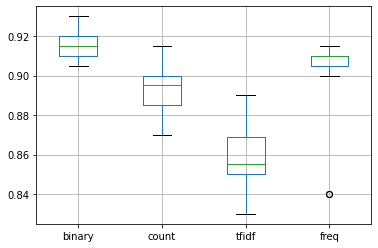

In [ ]:
from numpy import array
from string import punctuation
from os import listdir
from collections import Counter
from nltk.corpus import stopwords
from keras.preprocessing.text import Tokenizer
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from pandas import DataFrame
from matplotlib import pyplot
 
# load doc into memory
def load_doc(filename):
	# open the file as read only
	file = open(filename, 'r')
	# read all text
	text = file.read()
	# close the file
	file.close()
	return text
 
# turn a doc into clean tokens
def clean_doc(doc):
	# split into tokens by white space
	tokens = doc.split()
	# remove punctuation from each token
	table = str.maketrans('', '', punctuation)
	tokens = [w.translate(table) for w in tokens]
	# remove remaining tokens that are not alphabetic
	tokens = [word for word in tokens if word.isalpha()]
	# filter out stop words
	stop_words = set(stopwords.words('english'))
	tokens = [w for w in tokens if not w in stop_words]
	# filter out short tokens
	tokens = [word for word in tokens if len(word) > 1]
	return tokens
 
# load doc, clean and return line of tokens
def doc_to_line(filename, vocab):
	# load the doc
	doc = load_doc(filename)
	# clean doc
	tokens = clean_doc(doc)
	# filter by vocab
	tokens = [w for w in tokens if w in vocab]
	return ' '.join(tokens)
 
# load all docs in a directory
def process_docs(directory, vocab, is_trian):
	lines = list()
	# walk through all files in the folder
	for filename in listdir(directory):
		# skip any reviews in the test set
		if is_trian and filename.startswith('cv9'):
			continue
		if not is_trian and not filename.startswith('cv9'):
			continue
		# create the full path of the file to open
		path = directory + '/' + filename
		# load and clean the doc
		line = doc_to_line(path, vocab)
		# add to list
		lines.append(line)
	return lines
 
# evaluate a neural network model
def evaluate_mode(Xtrain, ytrain, Xtest, ytest):
	scores = list()
	n_repeats = 30
	n_words = Xtest.shape[1]
	for i in range(n_repeats):
		# define network
		model = Sequential()
		model.add(Dense(50, input_shape=(n_words,), activation='relu'))
		model.add(Dense(1, activation='sigmoid'))
		# compile network
		model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
		# fit network
		model.fit(Xtrain, ytrain, epochs=50, verbose=2)
		# evaluate
		loss, acc = model.evaluate(Xtest, ytest, verbose=0)
		scores.append(acc)
		print('%d accuracy: %s' % ((i+1), acc))
	return scores
 
# prepare bag of words encoding of docs
def prepare_data(train_docs, test_docs, mode):
	# create the tokenizer
	tokenizer = Tokenizer()
	# fit the tokenizer on the documents
	tokenizer.fit_on_texts(train_docs)
	# encode training data set
	Xtrain = tokenizer.texts_to_matrix(train_docs, mode=mode)
	# encode training data set
	Xtest = tokenizer.texts_to_matrix(test_docs, mode=mode)
	return Xtrain, Xtest
 
# load the vocabulary
vocab_filename = '/content/drive/My Drive/AIML_IIT_exe/AIML_HYD_15/Unit 1/txt_sentoken/vocab.txt'
vocab = load_doc(vocab_filename)
vocab = vocab.split()
vocab = set(vocab)
# load all training reviews
positive_lines = process_docs('/content/drive/My Drive/AIML_IIT_exe/AIML_HYD_15/Unit 1/txt_sentoken/pos', vocab, True)
negative_lines = process_docs('/content/drive/My Drive/AIML_IIT_exe/AIML_HYD_15/Unit 1/txt_sentoken/neg', vocab, True)
train_docs = negative_lines + positive_lines
# load all test reviews
positive_lines = process_docs('/content/drive/My Drive/AIML_IIT_exe/AIML_HYD_15/Unit 1/txt_sentoken/pos', vocab, False)
negative_lines = process_docs('/content/drive/My Drive/AIML_IIT_exe/AIML_HYD_15/Unit 1/txt_sentoken/neg', vocab, False)
test_docs = negative_lines + positive_lines
# prepare labels
ytrain = array([0 for _ in range(900)] + [1 for _ in range(900)])
ytest = array([0 for _ in range(100)] + [1 for _ in range(100)])
 
modes = ['binary', 'count', 'tfidf', 'freq']
results = DataFrame()
for mode in modes:
	# prepare data for mode
	Xtrain, Xtest = prepare_data(train_docs, test_docs, mode)
	# evaluate model on data for mode
	results[mode] = evaluate_mode(Xtrain, ytrain, Xtest, ytest)
# summarize results
print(results.describe())
# plot results
results.boxplot()
pyplot.show()

Running the example may take a while (about an hour on modern hardware with CPUs, not GPUs).

Note: Your results may vary given the stochastic nature of the algorithm or evaluation procedure, or differences in numerical precision. Consider running the example a few times and compare the average outcome.

At the end of the run, summary statistics for each word scoring method are provided, summarizing the distribution of model skill scores across each of the 30 runs per mode.



**We can see that the mean score of both the ‘freq‘ and ‘binary‘ methods appear to be better than ‘count‘ and ‘tfidf‘.**



A box and whisker plot of the results is also presented, summarizing the accuracy distributions per configuration.



**Making a Prediction for New Reviews**

Finally, we can use the final model to make predictions for new textual reviews.

This is why we wanted the model in the first place.

**Predicting the sentiment of new reviews involves following the same steps used to prepare the test data. Specifically, loading the text, cleaning the document, filtering tokens by the chosen vocabulary, converting the remaining tokens to a line, encoding it using the Tokenizer, and making a prediction**.

We can make a prediction of a class value directly with the fit model by calling predict() that will return a value that can be rounded to an integer of 0 for a negative review and 1 for a positive review.



In [ ]:
# classify a review as negative (0) or positive (1)
from keras.preprocessing.text import Tokenizer

def predict_sentiment(review, vocab, tokenizer, model):
	# clean
	tokens = clean_doc(review)
	# filter by vocab
	tokens = [w for w in tokens if w in vocab]
	# convert to line
	line = ' '.join(tokens)
	# encode
	encoded = tokenizer.texts_to_matrix([line], mode='freq')
	# prediction
	yhat = model.predict(encoded, verbose=0)
	return round(yhat[0,0])

We can now make predictions for new review texts.

In [ ]:
# test positive text
from keras.preprocessing.text import Tokenizer
tokenizer = Tokenizer
text = 'Best movie ever!'
print(predict_sentiment(text, vocab, tokenizer, model))
# test negative text
text = 'This is a bad movie.'
print(predict_sentiment(text, vocab, tokenizer, model))


NameError: ignored

Note: Your results may vary given the stochastic nature of the algorithm or evaluation procedure, or differences in numerical precision. Consider running the example a few times and compare the average outcome.



Ideally, we would fit the model on all available data (train and test) to create a final model and save the model and tokenizer to file so that they can be loaded and used in new software.



Manage Vocabulary. Explore using a larger or smaller vocabulary. Perhaps you can get better performance with a smaller set of words.
Tune the Network Topology. Explore alternate network topologies such as deeper or wider networks. Perhaps you can get better performance with a more suited network.
Use Regularization. Explore the use of regularization techniques, such as dropout. Perhaps you can delay the convergence of the model and achieve better test set performance.


[link text](https://machinelearningmastery.com/train-final-machine-learning-model/)


**What is a Final Model?**

A final machine learning model is a model that you use to make predictions on new data.

That is, given new examples of input data, you want to use the model to predict the expected output. This may be a **classification (assign a label)** or a **regression (a real value)**.

For example, whether the **photo is a picture of a dog or a cat**, or the **estimated number of sales for tomorrow**.





The goal of your machine learning project is to arrive at a final model that performs the best, where “best” is defined by:

**Data**: the historical data that you have available.
**Time**: the time you have to spend on the project.
**Procedure**: the data preparation steps, algorithm or algorithms, and the chosen algorithm configurations.

In your project, you gather the data, spend the time you have, and discover the data preparation procedures, algorithm to use, and how to configure it.

The final model is the pinnacle of this process, the end you seek in order to start actually making predictions.



**The Purpose of Train/Test Sets**

Why do we use train and test sets?
Creating a train and test split of your dataset is one method to quickly evaluate the performance of an algorithm on your problem.

The training dataset is used to prepare a model, to train it.

**We pretend the test dataset is new data where the output values are withheld from the algorithm. We gather predictions from the trained model on the inputs from the test dataset and compare them to the withheld output values of the test se**t.

Comparing the predictions and withheld outputs on the test dataset allows us to compute a performance measure for the model on the test dataset. This is an estimate of the skill of the algorithm trained on the problem when making predictions on unseen data.

**Let’s unpack this further**

When we evaluate an algorithm, we are in fact evaluating all steps in the procedure, including how the training data was prepared (e.g. scaling), the choice of algorithm (e.g. kNN), and how the chosen algorithm was configured (e.g. k=3).

The performance measure calculated on the predictions is an estimate of the skill of the whole procedure.

We *** generalize the performance measure from***:

“the skill of the procedure on the test set“
to

“the skill of the procedure on unseen data“.


This is quite a leap and requires that:

The procedure is sufficiently robust that the estimate of skill is close to what we actually expect on unseen data.
The choice of performance measure accurately captures what we are interested in measuring in predictions on unseen data.
The choice of data preparation is well understood and repeatable on new data, and reversible if predictions need to be returned to their original scale or related to the original input values.
The choice of algorithm makes sense for its intended use and operational environment (e.g. complexity or chosen programming language).

A lot rides on the estimated skill of the whole procedure on the test set.

In fact, using the train/test method of estimating the skill of the procedure on unseen data often has a high variance (unless we have a heck of a lot of data to split). This means that when it is repeated, it gives different results, often very different results.

The outcome is that we may be quite uncertain about how well the procedure actually performs on unseen data and how one procedure compares to another.

Often, time permitting, we prefer to use k-fold cross-validation instead.

**The Purpose of k-fold Cross Validation**

Why do we use k-fold cross validation?

Cross-validation is another method to estimate the skill of a method on unseen data. Like using a train-test split.

Cross-validation systematically creates and evaluates multiple models on multiple subsets of the dataset.

This, in turn, provides a population of performance measures.

We can calculate the mean of these measures to get an idea of how well the procedure performs on average.
We can calculate the standard deviation of these measures to get an idea of how much the skill of the procedure is expected to vary in practice.


This is also helpful for providing a more nuanced comparison of one procedure to another when you are trying to choose which algorithm and data preparation procedures to use.

Also, this information is invaluable as you can use the mean and spread to give a confidence interval on the expected performance on a machine learning procedure in practice.



Both train-test splits and k-fold cross validation are examples of resampling methods.

**Why do we use Resampling Methods?**

The problem with applied machine learning is that we are trying to model the unknown.

On a given predictive modeling problem, the ideal model is one that performs the best when making predictions on new data.

We don’t have new data, so we have to pretend with statistical tricks.

The train-test split and k-fold cross validation are called resampling methods. Resampling methods are statistical procedures for sampling a dataset and estimating an unknown quantity.

In the case of applied machine learning, we are interested in estimating the skill of a machine learning procedure on unseen data. More specifically, the skill of the predictions made by a machine learning procedure.

Once we have the estimated skill, we are finished with the resampling method.

If you are using a train-test split, that means you can discard the split datasets and the trained model.
If you are using k-fold cross-validation, that means you can throw away all of the trained models.
They have served their purpose and are no longer needed.

You are now ready to finalize your model.








**How to Finalize a Model?**

You finalize a model by applying the chosen machine learning procedure on all of your data.

That’s it.

With the finalized model, you can:

Save the model for later or operational use.
Make predictions on new data.
What about the cross-validation models or the train-test datasets?

They’ve been discarded. They are no longer needed. They have served their purpose to help you choose a procedure to finalize.


**Common Questions**
This section lists some common questions you might have.

Why not keep the model trained on the training dataset?
and

Why not keep the best model from the cross-validation?
You can if you like.

You may save time and effort by reusing one of the models trained during skill estimation.

This can be a big deal if it takes days, weeks, or months to train a model.

Your model will likely perform better when trained on all of the available data than just the subset used to estimate the performance of the model.

This is why we prefer to train the final model on all available data.

Won’t the performance of the model trained on all of the data be different?
I think this question drives most of the misunderstanding around model finalization.

Put another way:

If you train a model on all of the available data, then how do you know how well the model will perform?
You have already answered this question using the resampling procedure.

If well designed, the performance measures you calculate using train-test or k-fold cross validation suitably describe how well the finalized model trained on all available historical data will perform in general.

If you used k-fold cross validation, you will have an estimate of how “wrong” (or conversely, how “right”) the model will be on average, and the expected spread of that wrongness or rightness.

This is why the careful design of your test harness is so absolutely critical in applied machine learning. A more robust test harness will allow you to lean on the estimated performance all the more.

Each time I train the model, I get a different performance score; should I pick the model with the best score?
Machine learning algorithms are stochastic and this behavior of different performance on the same data is to be expected.

Resampling methods like repeated train/test or repeated k-fold cross-validation will help to get a handle on how much variance there is in the method.

If it is a real concern, you can create multiple final models and take the mean from an ensemble of predictions in order to reduce the variance.

I talk more about this in the post:

Embrace Randomness in Machine Learning
Summary
In this post, you discovered how to train a final machine learning model for operational use.

You have overcome obstacles to finalizing your model, such as:

Understanding the goal of resampling procedures such as train-test splits and k-fold cross validation.
Model finalization as training a new model on all available data.
Separating the concern of estimating performance from finalizing the model.
Do you have another question or concern about finalizing your model that I have not addressed?
Ask in the comments and I will do my best to help.